In [1]:
# @title Instalando as versões determinadas
!pip install pandas==1.5.2
!pip install seaborn==0.12.1
!pip install matplotlib==3.6.2
!pip install scikit-learn==1.2.0
!pip install plotly==5.11.0

!pip install --upgrade pip
!pip list

  Using cached scikit_learn-1.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.21.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.2.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster 

In [2]:
# @title  Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [4]:
# @title Leitura arquivos + Pergunta 1 + Tratamento

# Carregando e limpando os dados
dados_clinicos = pd.read_csv('/content/dados_clinicos.csv', sep=';', encoding='utf-8')

# Identificando a quantidade de dados ausentes por coluna
dados_ausentes_clinicos = dados_clinicos.isnull().sum()

#Pergunta 1
print("Quantidade de dados ausentes por coluna - Dados Clinicos:")
print(dados_ausentes_clinicos)

dados_clinicos.dropna().drop_duplicates()

dados_pacientes = pd.read_csv('/content/dados_pacientes.csv', sep=';', encoding='utf-8')
dados_ausentes_pacientes = dados_pacientes.isnull().sum()
print("Quantidade de dados ausentes por coluna - Dados Pacientes:")
print(dados_ausentes_pacientes)

dados_pacientes.dropna().drop_duplicates()

estado_regiao = pd.read_csv('/content/estado_regiao.csv', encoding='latin-1', sep=';')
dados_ausentes_estado = estado_regiao.isnull().sum()
print("Quantidade de dados ausentes por coluna - Dados Regiao:")
print(dados_ausentes_estado)

estado_regiao.drop_duplicates()

# Tratamento de dados ausentes para dados_pacientes
for col in dados_pacientes.columns:
    if dados_pacientes[col].dtype in ['float64', 'int64']:
        dados_pacientes[col].fillna(round(dados_pacientes[col].mean()), inplace=True)
    else:
        dados_pacientes[col].fillna(dados_pacientes[col].mode()[0], inplace=True)

dados_pacientes = dados_pacientes.drop_duplicates()

Quantidade de dados ausentes por coluna - Dados Clinicos:
id_cliente    0
peso          5
colesterol    0
genero        0
dtype: int64
Quantidade de dados ausentes por coluna - Dados Pacientes:
id_cliente           0
idade                0
classe_trabalho    387
escolaridade         0
id_estado            0
estado_civil         0
raca                 0
qtde_filhos         10
salario              0
dtype: int64
Quantidade de dados ausentes por coluna - Dados Regiao:
id_estado    0
sigla        0
estado       0
regiao       0
pais         0
dtype: int64


In [5]:
# @title Integração dados + Pergunta 2
# Integração dos dados
dados_integrados = pd.merge(dados_clinicos, dados_pacientes, on='id_cliente')
dados_integrados = pd.merge(dados_integrados, estado_regiao, left_on='id_estado', right_on='id_estado')
dados_integrados = dados_integrados.sort_values(by='id_cliente')
dados_integrados.head()

#Pergunta 2
# Após a integração dos dados
total_registros = dados_integrados.shape[0]
print(f"Total de registros após a integração dos dados: {total_registros}")

Total de registros após a integração dos dados: 590


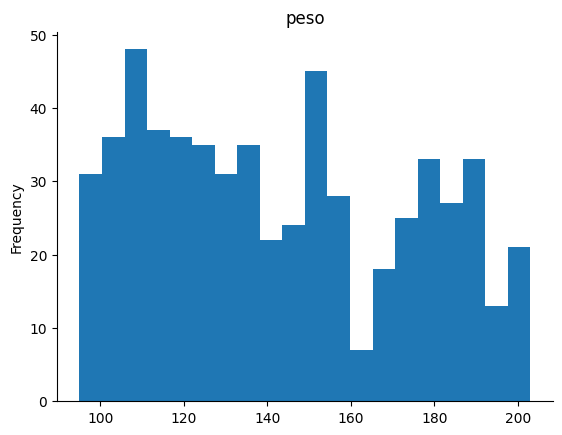

In [6]:
# @title Frequência Peso

dados_integrados['peso'].plot(kind='hist', bins=20, title='peso')
plt.gca().spines[['top', 'right',]].set_visible(False)

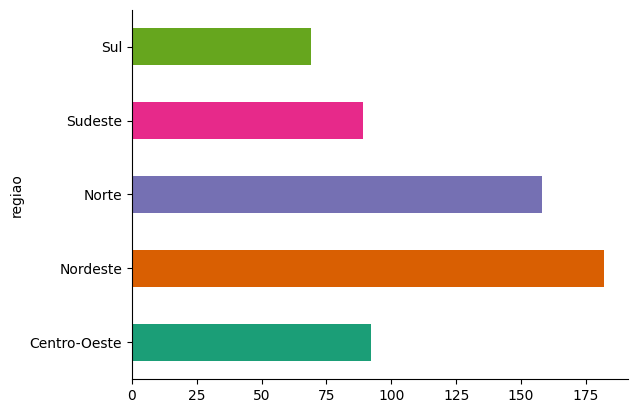

In [7]:
# @title Análise por região

dados_integrados.groupby('regiao').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

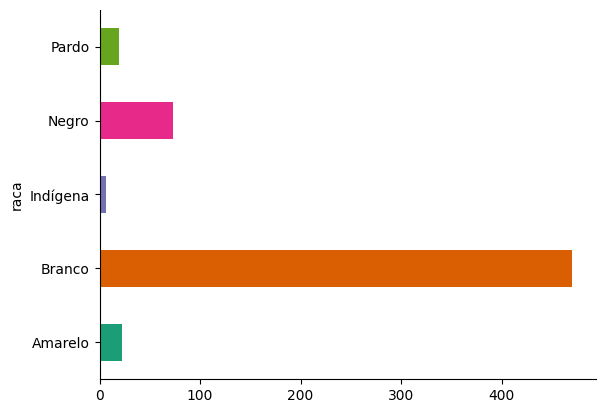

In [8]:
# @title Análise por Raça

dados_integrados.groupby('raca').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

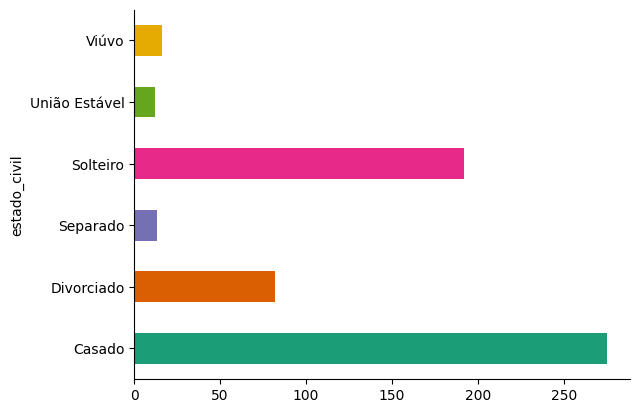

In [9]:
# @title Análise por Estado Civil

dados_integrados.groupby('estado_civil').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
# @title Descritivo do Dataset
# Análise exploratória
descricao_estatistica = dados_integrados.describe()
descricao_estatistica.head()

,id_cliente,peso,colesterol,idade,id_estado,qtde_filhos,salario
count,590.000000,585.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,283.696610,143.158974,170.067797,37.971186,14.293220,2.427119,3312.700000
std,156.464182,30.925402,39.325409,13.385020,8.075858,1.698079,2990.520723
min,1.000000,95.000000,102.000000,17.000000,1.000000,0.000000,0.000000
25%,148.250000,116.000000,135.250000,28.000000,7.000000,1.000000,1100.000000


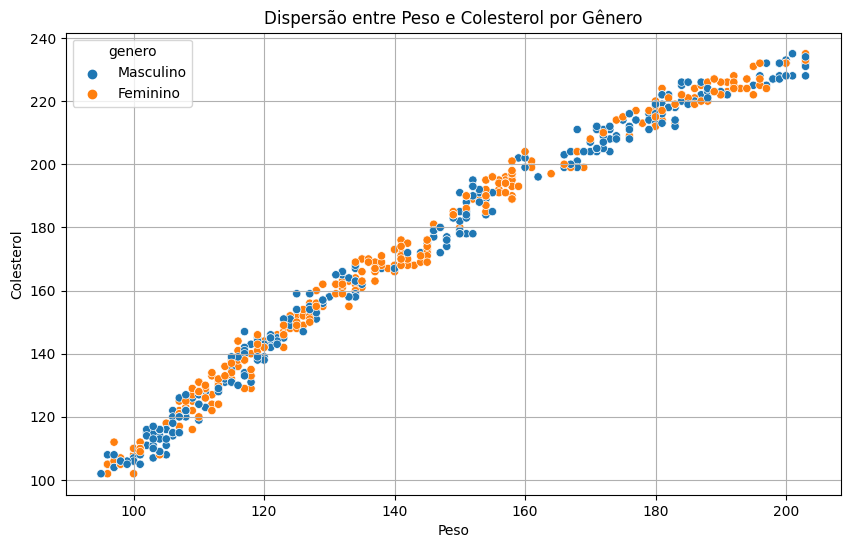

In [11]:
# @title Gráfico Dispersão
# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados_integrados, x='peso', y='colesterol', hue='genero')
plt.title('Dispersão entre Peso e Colesterol por Gênero')
plt.xlabel('Peso')
plt.ylabel('Colesterol')
plt.grid(True)
plt.show()

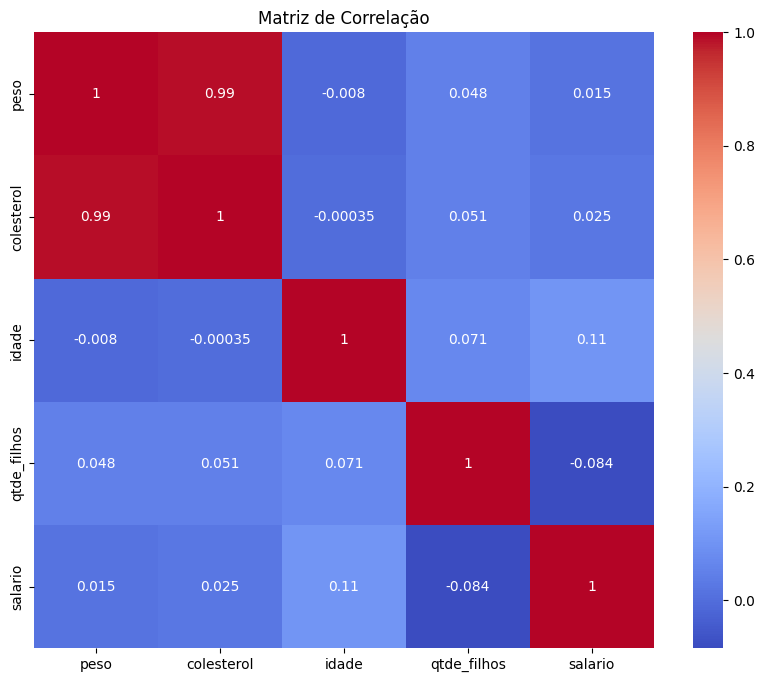

In [12]:
# @title Matriz de correlação
# Matriz de correlação
plt.figure(figsize=(10, 8))
correlacao = dados_integrados[['peso', 'colesterol', 'idade', 'qtde_filhos', 'salario']].corr()
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [15]:
# @title K-means, tava funcionando mas alterei na parte de tratamento e deixou de funcionar, tentando debugar com ChatGPT

# Aplicando k-means
X = dados_integrados[['peso', 'colesterol']].dropna()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
dados_integrados['cluster'] = kmeans.fit_predict(X)

ValueError: Length of values (585) does not match length of index (590)

In [16]:
# @title Mapeamento cluster e Visualização

# Mapeamento dos clusters para os riscos identificados
mapeamento_riscos = {1: 'Risco Baixo', 0: 'Risco Moderado', 2: 'Risco Alto'}
dados_integrados['Risco'] = dados_integrados['cluster'].map(mapeamento_riscos)

# Visualização dos clusters com as novas denominações
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados_integrados, x='peso', y='colesterol', hue='Risco', palette=['green', 'yellow', 'red'])
plt.title('Agrupamento por Risco de Problemas Cardiovasculares')
plt.xlabel('Peso')
plt.ylabel('Colesterol')
plt.grid(True)
plt.legend(title='Risco')
plt.show()

KeyError: 'cluster'

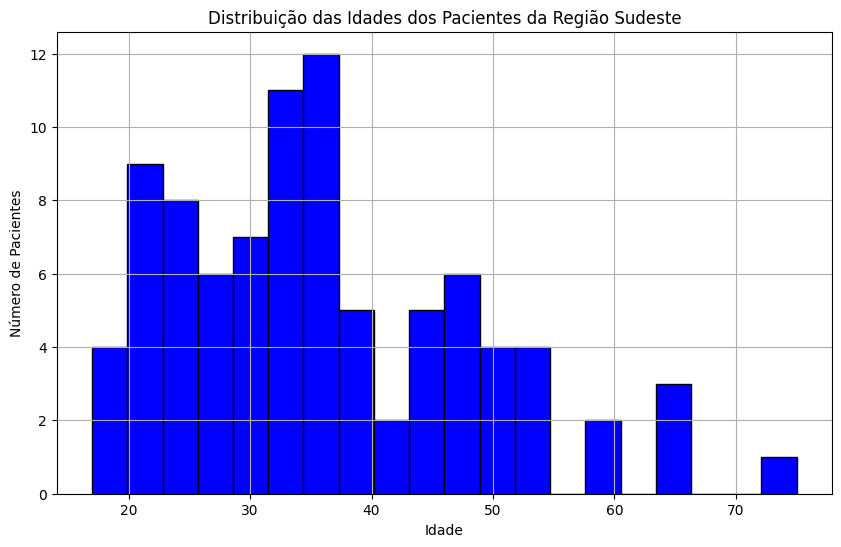

In [17]:
# @title Pergunta 3:
# Filtrando os dados para pacientes residentes na região Sudeste
pacientes_sudeste = dados_integrados[dados_integrados['regiao'] == 'Sudeste']

# Criando o histograma para a distribuição das idades com 20 barras
plt.figure(figsize=(10, 6))
plt.hist(pacientes_sudeste['idade'], bins=20, color='blue', edgecolor='black')
plt.title('Distribuição das Idades dos Pacientes da Região Sudeste')
plt.xlabel('Idade')
plt.ylabel('Número de Pacientes')
plt.grid(True)
plt.show()

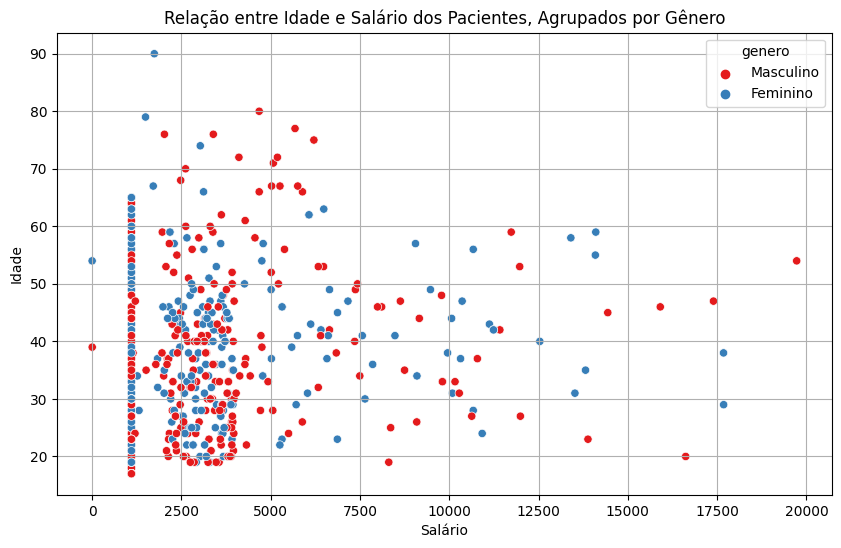

In [18]:
# @title Pergunta 4:

# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='salario', y='idade', hue='genero', data=dados_integrados, palette='Set1')
plt.title('Relação entre Idade e Salário dos Pacientes, Agrupados por Gênero')
plt.xlabel('Salário')
plt.ylabel('Idade')
plt.grid(True)
plt.show()

In [19]:
# @title Pergunta 5:
# Filtrando os dados para pacientes residentes na região Nordeste
pacientes_nordeste = dados_integrados[dados_integrados['regiao'] == 'Nordeste']

# Calculando a média salarial
media_salarial_nordeste = pacientes_nordeste['salario'].mean()
print(f"A média salarial para os residentes na região Nordeste é de {media_salarial_nordeste:.2f}")


A média salarial para os residentes na região Nordeste é de 3415.89


In [20]:
# @title Pergunta 6: Não tem a opção Piauí
# Filtrando os dados para pacientes residentes na região Nordeste
pacientes_nordeste = dados_integrados[dados_integrados['regiao'] == 'Nordeste']

# Agrupando por estado e calculando a média de idade
media_idade_por_estado = pacientes_nordeste.groupby('estado')['idade'].mean()

# Identificando o estado com a maior média de idade
estado_maior_media_idade = media_idade_por_estado.idxmax()
maior_media_idade = media_idade_por_estado.max()

print(f"O estado da região Nordeste com a maior média de idade é {estado_maior_media_idade}, com uma média de idade de {maior_media_idade:.2f} anos.")

O estado da região Nordeste com a maior média de idade é Piauí, com uma média de idade de 42.62 anos.


In [21]:
# @title Pergunta 7:
# Filtrando os dados para pacientes com grau de escolaridade 'Mestrado'
pacientes_mestrado = dados_integrados[dados_integrados['escolaridade'] == 'Mestrado']

# Contando o número de pacientes com Mestrado por estado
contagem_mestrado_por_estado = pacientes_mestrado['estado'].value_counts()

# Identificando o estado com o maior número de pacientes com Mestrado
estado_maior_numero_mestrado = contagem_mestrado_por_estado.idxmax()
maior_numero_mestrado = contagem_mestrado_por_estado.max()

print(f"O estado com o maior número de pacientes com grau de escolaridade 'Mestrado' é {estado_maior_numero_mestrado}, com {maior_numero_mestrado} pacientes.")

O estado com o maior número de pacientes com grau de escolaridade 'Mestrado' é Santa Catarina, com 5 pacientes.


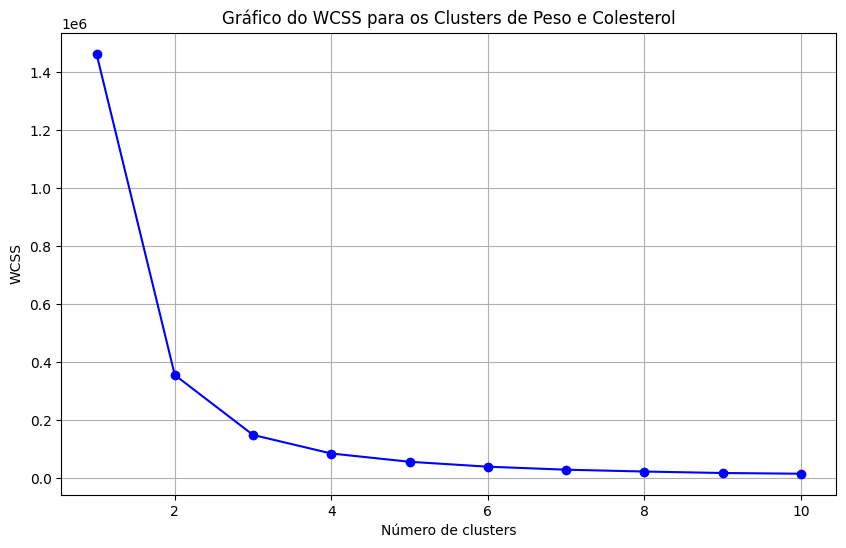

O valor de WCSS para o cluster de número 3 é: 149376.005


In [22]:
# @title Pergunta 8:
# Definindo o conjunto de dados
X = dados_integrados[['peso', 'colesterol']]
X = X.dropna()

# Calculando o WCSS para diferentes números de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Criando o gráfico do WCSS
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Gráfico do WCSS para os Clusters de Peso e Colesterol')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

valor_wcss_cluster_3 = wcss[2] #Indice 2 da lista

# Mostrando o valor com apenas três primeiros dígitos
print(f"O valor de WCSS para o cluster de número 3 é: {valor_wcss_cluster_3:.3f}")

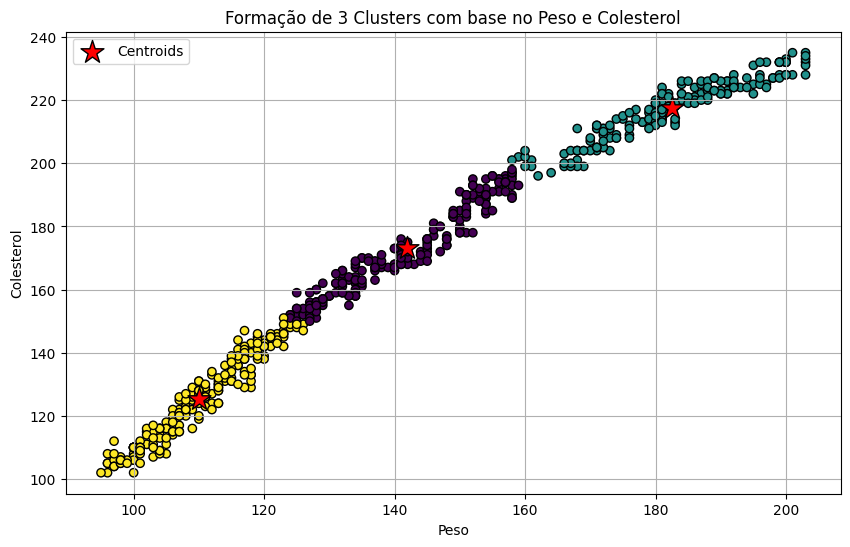

In [23]:
# @title Pergunta 9:
# Definindo os dados para o clustering
X = dados_integrados[['peso', 'colesterol']].dropna()

# Aplicando o k-means
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X)
clusters = kmeans.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X['peso'], X['colesterol'], c=clusters, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', edgecolor='k', label='Centroids')
plt.title('Formação de 3 Clusters com base no Peso e Colesterol')
plt.xlabel('Peso')
plt.ylabel('Colesterol')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# @title Pergunta 10:  tentando debugar com ChatGPT


# Com kmeans ajustado aos dados.
#kmeans = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X)

clusters, counts = np.unique(kmeans.labels_, return_counts=True)

# Identificando o cluster com o maior número de indivíduos
maior_cluster = clusters[np.argmax(counts)]
maior_contagem = counts[np.argmax(counts)]

print(f"O cluster com o maior número de indivíduos é o cluster {maior_cluster}, com {maior_contagem} indivíduos.")

kmeans_cluster = kmeans.cluster_centers_
print(f"Os centróides são {kmeans_cluster}.")

NameError: name 'np' is not defined

In [26]:
# @title Pergunta 11: Não consegui, respondi 125.51.  tentando debugar com ChatGPT


# Garantindo que X é derivado de dados_integrados
X = dados_integrados[['peso', 'colesterol']].dropna()  # Removendo NaNs se houver

# Verificando se o número de linhas em X é o mesmo que em dados_integrados após a remoção de NaNs
if len(X) == len(dados_integrados):
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    dados_integrados = dados_integrados.loc[X.index]  # Ajuste para garantir a mesma ordem e tamanho
    dados_integrados['cluster'] = kmeans.fit_predict(X)

    # Cluster de risco alto
    pacientes_risco_alto = dados_integrados[dados_integrados['cluster'] == 2]
    media_peso_risco_alto = pacientes_risco_alto['peso'].mean()

    print(f"A média do peso para os pacientes de risco alto é: {media_peso_risco_alto:.2f}")
else:
    print("Erro: O número de linhas em X e dados_integrados não corresponde.")

Erro: O número de linhas em X e dados_integrados não corresponde.


In [27]:
# @title Pergunta 12: Não consegui, respondi Risco Baixo.  tentando debugar com ChatGPT

# Calculando a média de idade para cada cluster
media_idade_por_cluster = dados_integrados.groupby('cluster')['idade'].mean()

# Identificando o cluster com a menor média de idade
menor_media_idade_cluster = media_idade_por_cluster.idxmin()
menor_media_idade = media_idade_por_cluster.min()

print(f"O cluster com a menor média de idade é o cluster {menor_media_idade_cluster}, com uma média de idade de {menor_media_idade:.2f} anos.")

KeyError: 'cluster'

In [28]:
# @title Pergunta 13: Não consegui, respondi Risco Alto

# Calculando a média de salário para cada cluster
media_salario_por_cluster = dados_integrados.groupby('cluster')['salario'].mean()

# Identificando o cluster com a maior média de salário
maior_media_salario_cluster = media_salario_por_cluster.idxmax()
maior_media_salario = media_salario_por_cluster.max()

print(f"O cluster com a maior média de salário é o cluster {maior_media_salario_cluster}, com uma média de salário de {maior_media_salario:.2f}.")

KeyError: 'cluster'